In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
df = pd.read_csv('/content/Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [44]:
df = df.drop(columns='Cabin', axis=1)

In [45]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
print(df['Embarked'].mode())

0    S
Name: Embarked, dtype: object


<ipython-input-45-6290d9d67fd4>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [46]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

<ipython-input-46-808ebb813aa0>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [47]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [49]:
df.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

<ipython-input-49-669a32cdb81e>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)


In [50]:
df= df.drop(columns = ['PassengerId','Name','Ticket'],axis=1)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [52]:
x = df.iloc[:,[1,2,3,4,5,6,7]].values
y = df['Survived'].values

In [53]:
x

array([[ 3.        ,  0.        , 22.        , ...,  0.        ,
         7.25      ,  0.        ],
       [ 1.        ,  1.        , 38.        , ...,  0.        ,
        71.2833    ,  1.        ],
       [ 3.        ,  1.        , 26.        , ...,  0.        ,
         7.925     ,  0.        ],
       ...,
       [ 3.        ,  1.        , 29.69911765, ...,  2.        ,
        23.45      ,  0.        ],
       [ 1.        ,  0.        , 26.        , ...,  0.        ,
        30.        ,  1.        ],
       [ 3.        ,  0.        , 32.        , ...,  0.        ,
         7.75      ,  2.        ]])

In [54]:
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0)

In [59]:
lr_model = LogisticRegression()

In [60]:
lr_model.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [67]:
x_train_prediction = lr_model.predict(x_train)

In [79]:
train_accuracy = accuracy_score(y_train, x_train_prediction)
print('Logistic Regression Accuracy score of train data is : ', train_accuracy)

Logistic Regression Accuracy score of train data is :  0.6661676646706587


In [80]:
x_test_predict = lr_model.predict(x_test)
test_accuracy = accuracy_score(y_test, x_test_predict)
print('Logistic Regression accuracy is : ', test_accuracy)

Logistic Regression accuracy is :  0.7982062780269058


In [81]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)

RandomForestClassifier()

In [82]:
x_train_prediction = lr_model.predict(x_train)
rf_model.fit(x_train, y_train)
train_accuracy = accuracy_score(y_train, x_train_prediction)
print('Random Forest Accuracy score of train data is : ', train_accuracy)

Random Forest Accuracy score of train data is :  0.8023952095808383


In [83]:
y_pred = rf_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Random Forest Accuracy: {accuracy:.4f}')

Random Forest Accuracy: 0.8296


In [84]:
svm_model = SVC()
svm_model.fit(x_train, y_train)

SVC()

In [85]:
x_train_prediction = svm_model.predict(x_train)
svm_model.fit(x_train, y_train)
train_accuracy = accuracy_score(y_train, x_train_prediction)
print('SVM Accuracy score of train data is : ', train_accuracy)

SVM Accuracy score of train data is :  0.6661676646706587


In [86]:
y_pred = svm_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'SVM Accuracy: {accuracy:.4f}')

SVM Accuracy: 0.7220


###Accuracy Comparision
* Logistic Regression Accuracy score of train data is :  0.6661676646706587
* Logistic Regression Accuracy is :  0.7982062780269058
* Random Forest Accuracy score of train data is :  0.8023952095808383
* Random Forest Accuracy is: 0.8341
* SVM Accuracy score of train data is :  0.6661676646706587
* SVM Accuracy is: 0.7220

###Random Forest Classifier got highest accuracy


##survival Prediction

In [31]:
#Enter Input data here
input_data = (3,1,22,0,0,7.77,0)
input_data_as_numpy_arr = np.asarray(input_data)
input_reshaped_data = input_data_as_numpy_arr.reshape(1,-1)

In [21]:
predict = rf_model.predict(input_reshaped_data)
if predict[0]==0:
    print("Dead")
if predict[0]==1:
    print("Alive")

Alive


<ipython-input-22-0f415a98584e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y)


<Axes: ylabel='Density'>

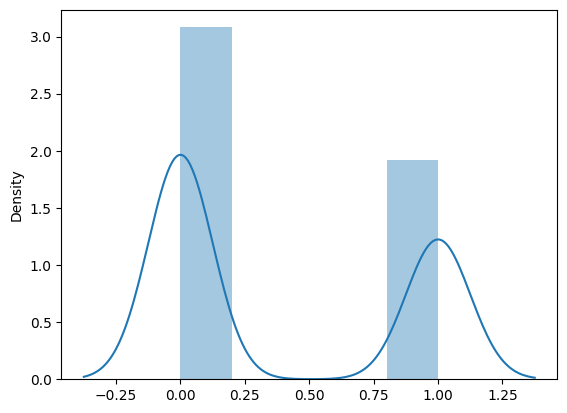

In [22]:
sns.distplot(y)

<ipython-input-23-34f1dc3e7a15>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train)


<Axes: ylabel='Density'>

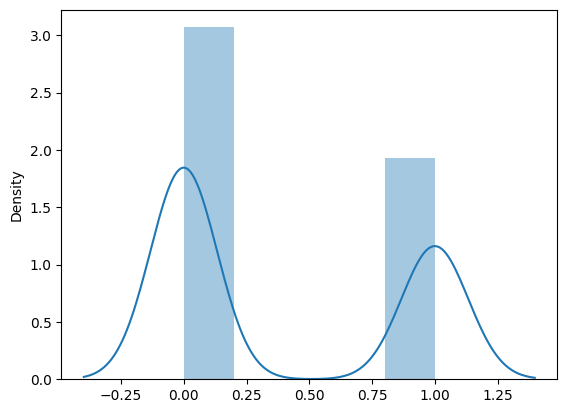

In [23]:
sns.distplot(y_train)

<ipython-input-24-e601a8e7e16a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test)


<Axes: ylabel='Density'>

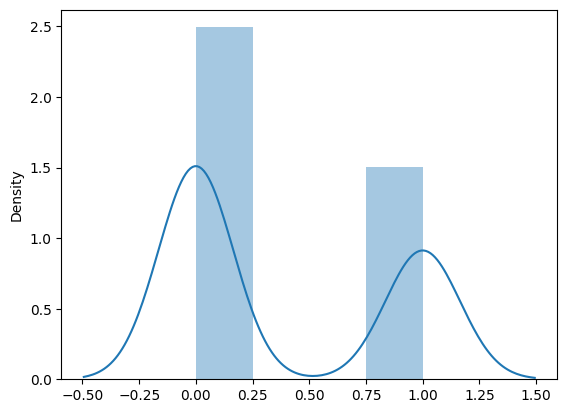

In [24]:
sns.distplot(y_test)

<ipython-input-30-87239393c6fa>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df, palette=['salmon', 'mediumseagreen'])  # Soft Red & Soft Green


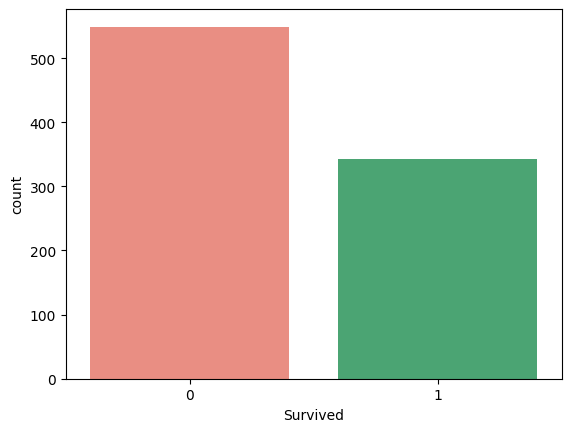

In [30]:
sns.countplot(x='Survived', data=df, palette=['salmon', 'mediumseagreen'])
plt.show()